In [1]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.datasets import mnist
import keras.backend as K
import matplotlib.pyplot as plt

K.set_image_data_format('channels_last')

In [1]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print('x_train.shape : ', x_train.shape)
print('x_test.shape : ', x_test.shape)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print('x_train.reshape : ', x_train.shape)
print('x_test.reshape : ', x_test.shape)

NameError: name 'mnist' is not defined

In [3]:
inputs = Input(784)

hidden1 = Dense(512, activation = 'relu')(inputs)

outputs = Dense(784, activation = 'relu')(hidden1)

ae_1 = Model(inputs, outputs, name='Outter-Auto-Encoder')
ae_1.summary()

Model: "Outter-Auto-Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 784)               402192    
                                                                 
Total params: 804,112
Trainable params: 804,112
Non-trainable params: 0
_________________________________________________________________


In [4]:
ae_1.compile(optimizer='adam', loss='mse')
history = ae_1.fit(x_train, x_train, validation_split=0.2, batch_size=100, epochs=30, verbose=1)

Epoch 1/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0115 - val_loss: 0.0051
Epoch 2/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 3/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 4/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 5/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 6/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 7/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 9/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 10/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0033

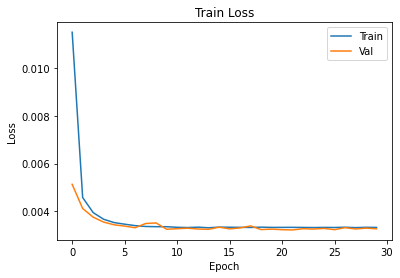

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')

In [7]:
inputs2 = Input(512)

hidden2 = Dense(256, activation='relu')(inputs2)

hidden3 = Dense(512, activation='relu')(hidden2)

ae_2 = Model(inputs2, hidden3, name='Inner-Auto-Encoder')
ae_2.summary()

Model: "Inner-Auto-Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
Total params: 262,912
Trainable params: 262,912
Non-trainable params: 0
_________________________________________________________________


In [8]:
encoded = Model(inputs, hidden1, name='first-layer-code')

encoded_code = encoded.predict(x_train)
print(encoded_code.shape)

1875/1875 [==============================] - 1s 492us/step
(60000, 512)


In [9]:
ae_2.compile(optimizer='adam', loss='mse')
history2 = ae_2.fit(encoded_code, encoded_code, validation_split=0.2, batch_size=100, epochs=30, verbose=1)

Epoch 1/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0400 - val_loss: 0.0222
Epoch 2/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0189 - val_loss: 0.0162
Epoch 3/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0151 - val_loss: 0.0143
Epoch 4/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0138 - val_loss: 0.0134
Epoch 5/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 6/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 7/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 8/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 9/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 10/30
480/480 [==============================] - 1s 2ms/step - loss: 0.0126 - val_loss: 0.0125

In [10]:
predictions = ae_2.predict(encoded_code)
predictions.shape

1875/1875 [==============================] - 1s 529us/step


(60000, 512)

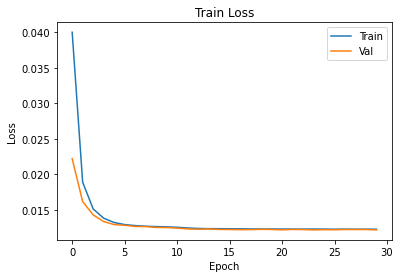

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')

In [12]:
input_img = Input(784)
copy_hidden1 = Dense(512, activation='relu')(input_img)
copy_hidden2 = Dense(256, activation='relu')(copy_hidden1)
copy_hidden3 = Dense(512, activation='relu')(copy_hidden2)
decoded_img = Dense(784, activation='relu')(copy_hidden3)

AE = Model(inputs=input_img, outputs=decoded_img)

AE.layers[1].set_weights(ae_1.layers[1].get_weights())
AE.layers[2].set_weights(ae_2.layers[1].get_weights())
AE.layers[3].set_weights(ae_2.layers[2].get_weights())
AE.layers[4].set_weights(ae_1.layers[2].get_weights())

decoded_img = AE.predict(x_train)
decoded_img.shape

1875/1875 [==============================] - 1s 569us/step


(60000, 784)

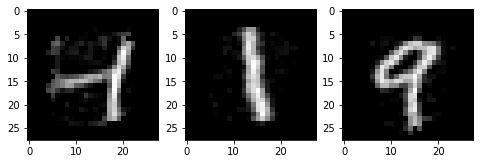

In [13]:
fig = plt.figure(figsize = (8, 8))

ax1 = fig.add_subplot(234)
plt.imshow(decoded_img[2].reshape(28, 28), cmap='gray')

ax2 = fig.add_subplot(235)
plt.imshow(decoded_img[6].reshape(28, 28), cmap='gray')

ax3 = fig.add_subplot(236)
plt.imshow(decoded_img[4].reshape(28, 28), cmap='gray')